In [1]:
import matplotlib.pyplot as plt

from poles_roots.global_zero_pole import find_zeros_poles
from poles_roots.plotting import phase_plot, plot_poles_zeros

## Pole on diagonal

The first possible edge case is that a pole lies on a diagonal of the triangulation. We can detect this as the quadrature will not converge. In which case we break the diagonal on which the quadrature does not converge. This is shown in the following example.

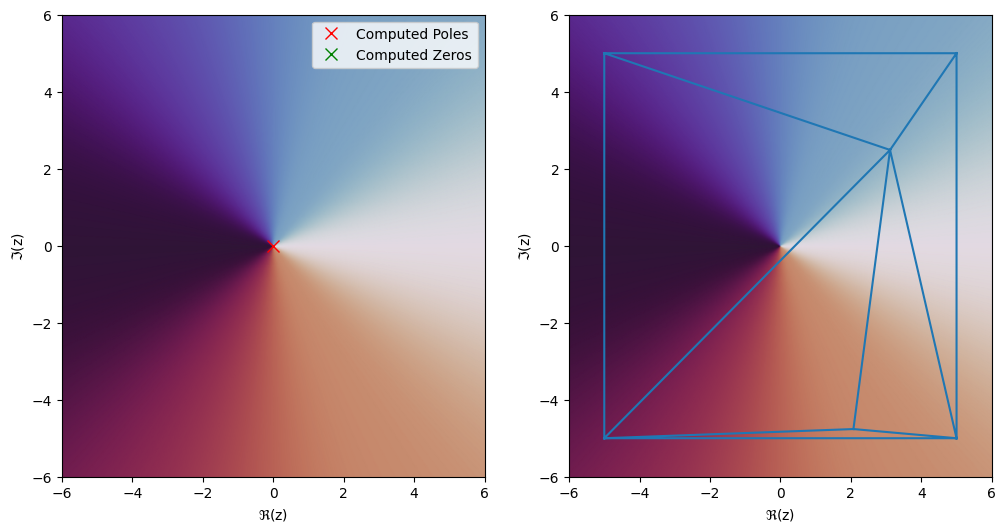

In [2]:
res = find_zeros_poles(
    lambda z: 1/z,
    lambda z: -1/z**2,
    initial_points=[-5 - 5j, 5 - 5j, 5 + 5j, -5 + 5j],
    arg_principal_threshold=1.1,
    num_sample_points=50,
)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
phase_plot(lambda z: 1/z, axs[0], domain=[-6, 6, -6, 6])
phase_plot(lambda z: 1/z, axs[1], domain=[-6, 6, -6, 6])
plot_poles_zeros(res, axs[0])
axs[0].legend()
axs[1].triplot(res.points[:, 0], res.points[:, 1], res.simplices)
plt.show()

If there is a pole on the convex hull we cannot break that edge without changing the convex hull so instead we raise an error.

In [4]:
res = find_zeros_poles(
    lambda z: 1/z,
    lambda z: -1/z**2,
    initial_points=[-5, 5, 5 + 5j, -5 + 5j],
    arg_principal_threshold=1.1,
    num_sample_points=50,
)

ValueError: Pole/Zero detected on the convex hull.

## Zero on a diagonal

In a similar fashion to when there is a pole, we can check if the integral $1/f$ converges and if not destroy that edge.

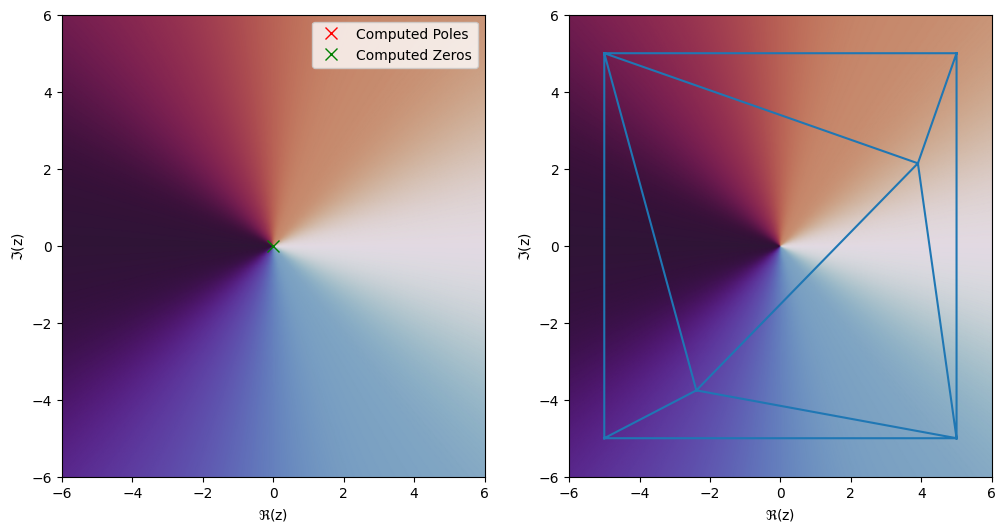

In [5]:
res = find_zeros_poles(
    lambda z: z,
    lambda z: 1,
    initial_points=[-5 - 5j, 5 - 5j, 5 + 5j, -5 + 5j],
    arg_principal_threshold=1.1,
    num_sample_points=50,
)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
phase_plot(lambda z: z, axs[0], domain=[-6, 6, -6, 6])
phase_plot(lambda z: z, axs[1], domain=[-6, 6, -6, 6])
plot_poles_zeros(res, axs[0])
axs[0].legend()
axs[1].triplot(res.points[:, 0], res.points[:, 1], res.simplices)
plt.show()

And as before if there is a zero on the convex hull we raise an error as we cannot destroy the edge without changing the convex hull.

In [6]:
res = find_zeros_poles(
    lambda z: z,
    lambda z: 1,
    initial_points=[-5, 5, 5 - 5j, -5 - 5j],
    arg_principal_threshold=1.1,
    num_sample_points=50,
)

/home/jakeb/development/poles-and-roots/src/poles_roots/integration.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  return f(param(t)) * param_jac


ValueError: Pole/Zero detected on the convex hull.